In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def build_pipeline(df: pd.DataFrame, target: str = "TedaviSuresi"):
    
    X = df.drop(columns=[target]) if target in df.columns else df.copy()

    num_cols = list(X.select_dtypes(include=["number"]).columns)
    cat_cols = [c for c in X.columns if c not in num_cols]

    num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    cat_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ])

    pre = ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])

    return pre


In [22]:
from pathlib import Path
import pandas as pd

# 1) Print the current working directory (diagnostic)
print("CWD:", Path.cwd())

# 2) Automatically detect the project root (works even if the notebook is under 'notebooks/')
CWD = Path.cwd()
candidates = [CWD, CWD.parent, CWD.parent.parent]
BASE = None
for c in candidates:
    if (c / "data" / "Talent_Academy_Case_DT_2025.xlsx").exists():
        BASE = c
        break

if BASE is None:
    raise FileNotFoundError("Project root not found. Where is 'data/Talent_Academy_Case_DT_2025.xlsx'?")

DATA = (BASE / "data" / "Talent_Academy_Case_DT_2025.xlsx").resolve()
print("DATA:", DATA, "| exists:", DATA.exists())

# 3) Read the Excel file
df = pd.read_excel(DATA)
print("OK, rows:", len(df), "cols:", len(df.columns))


CWD: c:\Users\yade\pusula_ds_case\pusula_ds_case_template\pusula_ds_case_template\notebooks
DATA: C:\Users\yade\pusula_ds_case\pusula_ds_case_template\pusula_ds_case_template\data\Talent_Academy_Case_DT_2025.xlsx | exists: True
OK, rows: 2235 cols: 13


In [23]:
# 2) General information
display(df.shape)
display(df.dtypes)
display(df.info())  
display(df.describe(include='all').T.head(20))

# Missing value counts
na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts)


(2235, 13)

HastaNo             int64
Yas                 int64
Cinsiyet           object
KanGrubu           object
Uyruk              object
KronikHastalik     object
Bolum              object
Alerji             object
Tanilar            object
TedaviAdi          object
TedaviSuresi       object
UygulamaYerleri    object
UygulamaSuresi     object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HastaNo,2235.0,NaN,NaN,NaN,145333.100224,115.214248,145134.0,145235.0,145331.0,145432.0,145537.0
Yas,2235.0,NaN,NaN,NaN,47.327069,15.208634,2.0,38.0,46.0,56.0,92.0
Cinsiyet,2066,2,Kadın,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KanGrubu,1560,8,0 Rh+,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uyruk,2235,5,Türkiye,2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KronikHastalik,1624,220,Myastenia gravis,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bolum,2224,10,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alerji,1291,38,Polen,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tanilar,2160,367,"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TedaviAdi,2235,244,Dorsalji -Boyun+trapez,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alerji             944
KanGrubu           675
KronikHastalik     611
UygulamaYerleri    221
Cinsiyet           169
Tanilar             75
Bolum               11
HastaNo              0
Yas                  0
Uyruk                0
TedaviAdi            0
TedaviSuresi         0
UygulamaSuresi       0
dtype: int64

In [21]:
# 3) ID and duplicate check (assuming HastaNo is the identifier)
if 'HastaNo' in df.columns:
    print("HastaNo null:", df['HastaNo'].isna().sum())
    print("HastaNo unique:", df['HastaNo'].nunique() == len(df))
    dup = df[df['HastaNo'].duplicated(keep=False)].sort_values('HastaNo')
    if not dup.empty:
        print("Duplicate ID records:")
        display(dup.head(10))
else:
    print("HastaNo column not found — skipping.")


HastaNo null: 0
HastaNo unique: False
Duplicate ID records:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_raw
1,145135.0,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Polen,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,Boyun,20 Dakika,15 Seans
2,145135.0,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Polen,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,"Boyun,Sırt",20 Dakika,15 Seans
3,145135.0,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Polen,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,Boyun,5 Dakika,15 Seans
4,145135.0,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Polen,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,"Boyun,Sırt",20 Dakika,15 Seans
5,145135.0,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Polen,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,Boyun,20 Dakika,15 Seans
6,145136.0,60.0,Erkek,0 Rh+,Türkiye,Myastenia gravis,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10.0,Bel,30 Dakika,10 Seans
7,145136.0,60.0,Erkek,0 Rh+,Türkiye,Myastenia gravis,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10.0,Bel,20 Dakika,10 Seans
8,145136.0,60.0,Erkek,0 Rh+,Türkiye,Myastenia gravis,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10.0,Bel,20 Dakika,10 Seans
9,145137.0,65.0,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15.0,Sol El Bilek Bölgesi,15 Dakika,15 Seans
10,145137.0,65.0,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15.0,Sol El Bilek Bölgesi,20 Dakika,15 Seans


Numeric columns: ['HastaNo', 'Yas', 'TedaviSuresi']


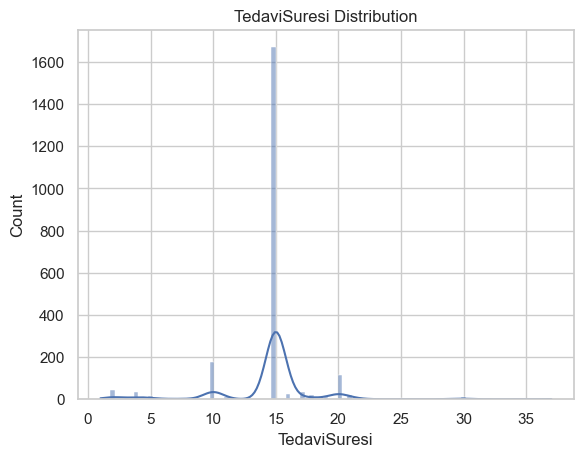

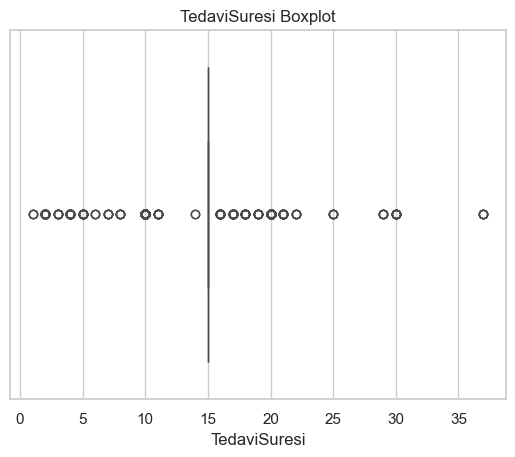

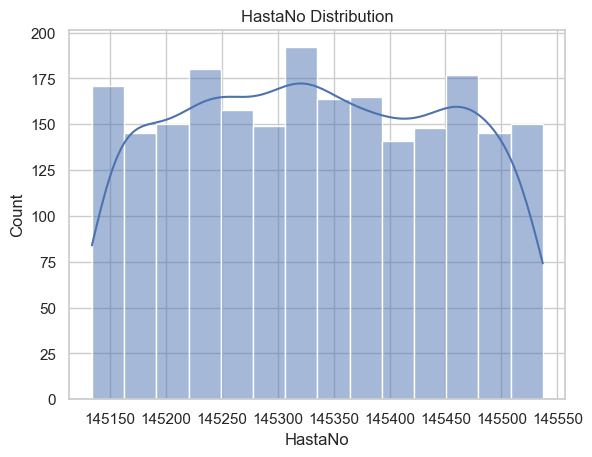

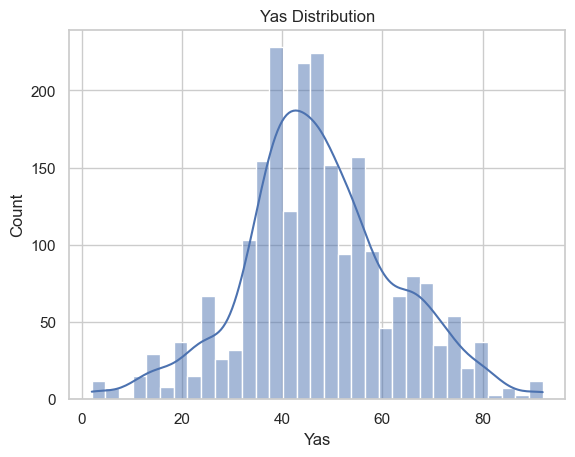

In [20]:
# 4) Numerical distributions & target (TedaviSuresi)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", num_cols)

%matplotlib inline
sns.set(style="whitegrid")  # make plots look nicer

# Target distribution (if available)
if 'TedaviSuresi' in df.columns:
    sns.histplot(df['TedaviSuresi'], kde=True)
    plt.title('TedaviSuresi Distribution')
    plt.show()
    sns.boxplot(x=df['TedaviSuresi'])
    plt.title('TedaviSuresi Boxplot')
    plt.show()

# Histograms for all numerical columns (first 6 columns as example)
for c in num_cols[:6]:
    if c != 'TedaviSuresi':
        sns.histplot(df[c], kde=True)
        plt.title(f'{c} Distribution')
        plt.show()


Categorical columns: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']

Cinsiyet — top 20 categories:


Cinsiyet
Kadın    1274
Erkek     792
NaN       169
Name: count, dtype: int64

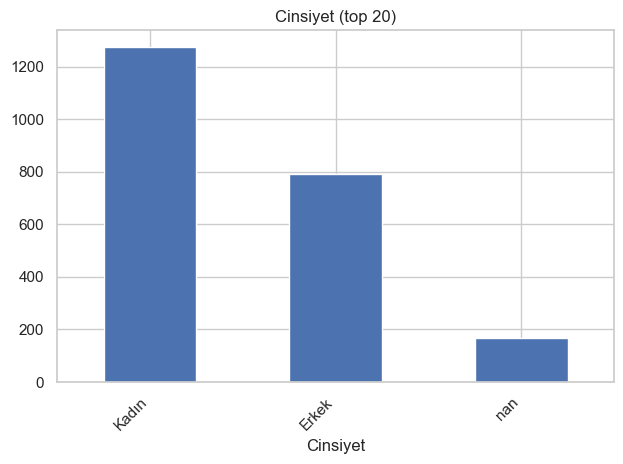


KanGrubu — top 20 categories:


KanGrubu
NaN       675
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64

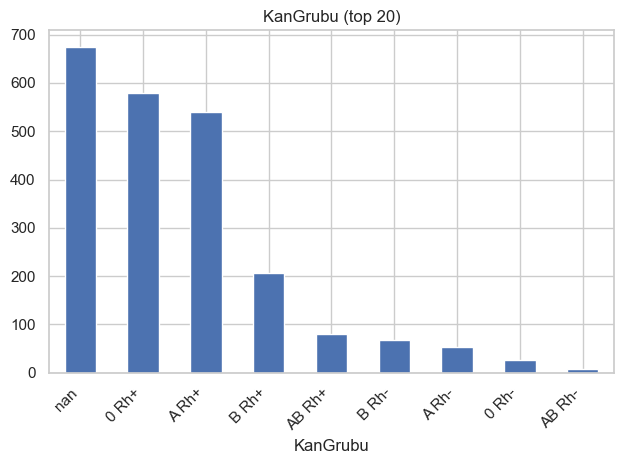


Uyruk — top 20 categories:


Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64

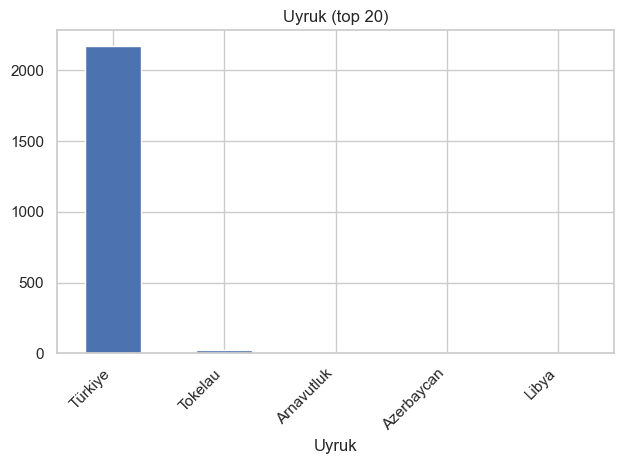


KronikHastalik — top 20 categories:


KronikHastalik
NaN                                                                          611
Myastenia gravis                                                              38
Aritmi                                                                        36
Fascioscapulohumeral Distrofi                                                 36
Hipertiroidizm                                                                34
Limb-Girdle Musküler Distrofi, Astım                                          34
Kalp yetmezliği                                                               33
Hipertansiyon                                                                 31
Astım                                                                         30
Becker Musküler Distrofisi                                                    29
Limb-Girdle Musküler Distrofi                                                 28
Limb-Girdle Musküler Distrofi, Kalp yetmezliği, Astım, Polimiyozit            27
Limb-Girdle M

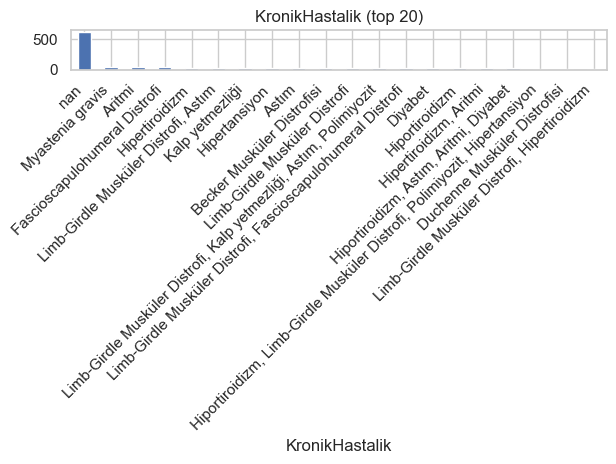

In [24]:
# 5) Categorical distributions (example: first 4 categorical columns)
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print("Categorical columns:", cat_cols)

for c in cat_cols[:4]:
    vc = df[c].value_counts(dropna=False).head(20)
    print(f"\n{c} — top 20 categories:")
    display(vc)
    vc.plot.bar()
    plt.title(f'{c} (top 20)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [25]:
import re
import numpy as np
import pandas as pd

def clean_tedavi_suresi(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower().strip()
    # find numbers inside the string
    match = re.findall(r'\d+', s)
    if match:
        return float(match[0])  # take the first number found
    return np.nan

# Convert TedaviSuresi to numeric
df['TedaviSuresi'] = df['TedaviSuresi'].apply(clean_tedavi_suresi)

# Fill missing values with median
median_val = df['TedaviSuresi'].median(skipna=True)
df['TedaviSuresi'] = df['TedaviSuresi'].fillna(median_val)

print("Column dtype:", df['TedaviSuresi'].dtype)
print("First 10 values:", df['TedaviSuresi'].head(10).tolist())

# TedaviSuresi: fully convert text to numbers
df['TedaviSuresi'] = (
    df['TedaviSuresi']
    .astype(str)                                # convert to string
    .str.replace(r'[^0-9.,]', '', regex=True)   # remove everything except digits, dot, comma
    .str.replace(',', '.', regex=False)         # replace comma with dot
)

# Convert empty strings to NaN and cast to numeric
df['TedaviSuresi'] = pd.to_numeric(df['TedaviSuresi'], errors='coerce')

# Fill missing values with median
median_val = df['TedaviSuresi'].median(skipna=True)
df['TedaviSuresi'] = df['TedaviSuresi'].fillna(median_val)

print(df['TedaviSuresi'].head(20))
print("Type:", df['TedaviSuresi'].dtype)


Column dtype: float64
First 10 values: [5.0, 15.0, 15.0, 15.0, 15.0, 15.0, 10.0, 10.0, 10.0, 15.0]
0      5.0
1     15.0
2     15.0
3     15.0
4     15.0
5     15.0
6     10.0
7     10.0
8     10.0
9     15.0
10    15.0
11    15.0
12    15.0
13    15.0
14    15.0
15    15.0
16    15.0
17    15.0
18    15.0
19    15.0
Name: TedaviSuresi, dtype: float64
Type: float64


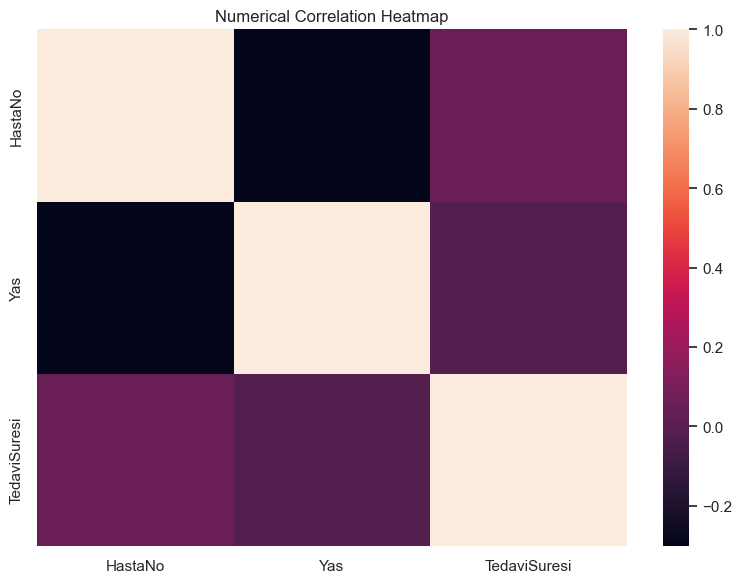

In [26]:
# 6) Correlation (only numerical columns)
num_only = df.select_dtypes(include=['number'])
if not num_only.empty:
    corr = num_only.corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=False)
    plt.title('Numerical Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")


In [27]:
print("Type:", df['TedaviSuresi'].dtype)
print("First 20 unique values:", df['TedaviSuresi'].unique()[:20])
print("Number of NaN values:", df['TedaviSuresi'].isna().sum())
print("Total rows:", len(df))


Type: float64
First 20 unique values: [ 5. 15. 10. 18. 20.  2.  6.  4. 30. 11. 16. 21.  1.  8.  3.  7. 19. 29.
 14. 17.]
Number of NaN values: 0
Total rows: 2235


In [28]:
from pathlib import Path
import pandas as pd
import numpy as np
import re

# 1) Reload only the TedaviSuresi column from the original file
data_path = Path("../data/Talent_Academy_Case_DT_2025.xlsx")
raw_ts = pd.read_excel(data_path, usecols=["TedaviSuresi"])

# 2) Check if row counts match with df
assert len(raw_ts) == len(df), "Row count mismatch! Wrong file or filter applied."

# 3) Backup the original column and write it back to df
df["TedaviSuresi_raw"] = raw_ts["TedaviSuresi"]

# 4) Extract numeric values from text (e.g., 5, 10, 45.5). Also convert comma to dot.
clean_num = (
    df["TedaviSuresi_raw"]
      .astype(str)
      .str.replace(r"[^0-9.,]", "", regex=True)          # remove everything except digits, dot, comma
      .str.replace(",", ".", regex=False)                # comma -> dot
      .str.extract(r"(\d+(?:\.\d+)?)", expand=False)     # extract first number
)

df["TedaviSuresi"] = pd.to_numeric(clean_num, errors="coerce")

# 5) Fill missing values (fallback if all are NaN)
if df["TedaviSuresi"].notna().any():
    med = df["TedaviSuresi"].median()
    df["TedaviSuresi"] = df["TedaviSuresi"].fillna(med)
else:
    # if all values are NaN, text may contain words like "session" but no numbers -> set to 0 (or most frequent value)
    df["TedaviSuresi"] = 0.0

print("Type:", df["TedaviSuresi"].dtype)
print("Non-null count:", df["TedaviSuresi"].notna().sum())
print("First 10 values:", df["TedaviSuresi"].head(10).tolist())


Type: int64
Non-null count: 2235
First 10 values: [5, 15, 15, 15, 15, 15, 10, 10, 10, 15]


In [29]:
# 7) Text cleaning (strip + normalize spaces) and example of list columns
text_cols_expected = ['Cinsiyet','KanGrubu','Uyruk','KronikHastalik','Bolum',
                      'Alerji','Tanilar','TedaviAdi','UygulamaYerleri','UygulamaSuresi']
text_cols = [c for c in text_cols_expected if c in df.columns]

for c in text_cols:
    df[c] = df[c].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

import re
def to_minutes(x):
    s = str(x).lower().strip()
    if s in ['nan','','none']: return np.nan
    m = re.findall(r'(\d+(?:[.,]\d+)?)\s*(saat|dk|min)?', s)
    if not m:
        try: return float(s)
        except: return np.nan
    val, unit = m[0]
    val = float(val.replace(',','.'))
    if unit in [None,'', 'dk','min']: return val
    if unit=='saat': return val*60
    return val

# Convert UygulamaSuresi values to minutes if the column exists
if 'UygulamaSuresi' in df.columns:
    df['UygulamaSuresi'] = df['UygulamaSuresi'].apply(to_minutes)

# Handle list-like columns
list_cols = [c for c in ['KronikHastalik','Alerji','Tanilar','UygulamaYerleri'] if c in df.columns]
def split_list(s):
    if pd.isna(s) or s in ['nan','None']: return []
    return [t.strip().title() for t in str(s).split(',') if t.strip()]

for c in list_cols:
    df[c] = df[c].apply(split_list)

df.head()



,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_raw
0,145134,60,Kadın,0 Rh+,Türkiye,"[Becker Musküler Distrofisi, Hiportiroidizm, K...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[Toz],[Ayak Bileği Ve Ayağın Yüzeysel Yaralanması],Ayak Bileği,5,[Ayak Bileği],20.0,5 Seans
1,145135,28,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15,[Boyun],20.0,15 Seans
2,145135,28,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15,"[Boyun, Sırt]",20.0,15 Seans
3,145135,28,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15,[Boyun],5.0,15 Seans
4,145135,28,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15,"[Boyun, Sırt]",20.0,15 Seans


In [30]:
# 8) Missing value imputation (simple example): numeric = median, categorical = mode
from sklearn.impute import SimpleImputer

# Numerical columns
num_cols = df.select_dtypes(include=['number']).columns
if len(num_cols) > 0:
    imp_num = SimpleImputer(strategy='median')
    df[num_cols] = imp_num.fit_transform(df[num_cols])

# Categorical columns (for non-list text columns)
non_num = df.select_dtypes(exclude=['number']).columns
# Skip list-like columns:
simple_cat = [c for c in non_num if not (df[c].apply(lambda x: isinstance(x, list)).all())]
if len(simple_cat) > 0:
    imp_cat = SimpleImputer(strategy='most_frequent')
    df[simple_cat] = imp_cat.fit_transform(df[simple_cat])

df.head()


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_raw
0,145134.0,60.0,Kadın,0 Rh+,Türkiye,"[Becker Musküler Distrofisi, Hiportiroidizm, K...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[Toz],[Ayak Bileği Ve Ayağın Yüzeysel Yaralanması],Ayak Bileği,5.0,[Ayak Bileği],20.0,5 Seans
1,145135.0,28.0,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15.0,[Boyun],20.0,15 Seans
2,145135.0,28.0,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15.0,"[Boyun, Sırt]",20.0,15 Seans
3,145135.0,28.0,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15.0,[Boyun],5.0,15 Seans
4,145135.0,28.0,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15.0,"[Boyun, Sırt]",20.0,15 Seans


In [ ]:
# 9) Save the cleaned dataset
output_path = Path("../outputs/cleaned_dataset.csv")
df.to_csv(output_path, index=False)

rows, cols = df.shape
print(f"Saved: {output_path.as_posix()} | Rows: {rows}, Columns: {cols}")


Kaydedildi: ../outputs/cleaned_dataset.csv
